## Task5 模型融合

Tip:此部分为零基础入门金融风控的 Task5 模型融合部分，欢迎大家后续多多交流。

赛题：零基础入门数据挖掘 - 零基础入门金融风控之贷款违约预测

项目地址：https://github.com/datawhalechina/team-learning-data-mining/tree/master/FinancialRiskControl

比赛地址：https://tianchi.aliyun.com/competition/entrance/531830/introduction

### 5.1 学习目标
将之前建模调参的结果进行模型融合。
尝试多种融合方案，提交融合结果并打卡。（模型融合一般用于A榜比赛的尾声和B榜比赛的全程）

### 5.2 内容介绍
模型融合是比赛后期上分的重要手段，特别是多人组队学习的比赛中，将不同队友的模型进行融合，可能会收获意想不到的效果哦，往往模型相差越大且模型表现都不错的前提下，模型融合后结果会有大幅提升，以下是模型融合的方式。
- 平均：
    - 简单平均法
    - 加权平均法
- 投票：
    - 简单投票法
    - 加权投票法
- 综合：
    - 排序融合
    - log融合
- stacking:
    - 构建多层模型，并利用预测结果再拟合预测。
- blending：
    - 选取部分数据预测训练得到预测结果作为新特征，带入剩下的数据中预测。
- boosting/bagging（在Task4中已经提及，就不再赘述）


### 5.3 stacking\blending详解

- stacking
将若干基学习器获得的预测结果，将预测结果作为新的训练集来训练一个学习器。如下图 假设有五个基学习器，将数据带入五基学习器中得到预测结果，再带入模型六中进行训练预测。但是由于直接由五个基学习器获得结果直接带入模型六中，容易导致过拟合。所以在使用五个及模型进行预测的时候，可以考虑使用K折验证，防止过拟合。


![stacking.png](https://img-blog.csdnimg.cn/2020091301240256.png)


- blending
与stacking不同，blending是将预测的值作为新的特征和原特征合并，构成新的特征值，用于预测。为了防止过拟合，将数据分为两部分d1、d2，使用d1的数据作为训练集，d2数据作为测试集。预测得到的数据作为新特征使用d2的数据作为训练集结合新特征，预测测试集结果。


![blending.png](https://img-blog.csdnimg.cn/20200913012401958.png)


- Blending与stacking的不同
    - stacking
        - stacking中由于两层使用的数据不同，所以可以避免信息泄露的问题。
        - 在组队竞赛的过程中，不需要给队友分享自己的随机种子。
    - Blending
        - 由于blending对将数据划分为两个部分，在最后预测时有部分数据信息将被忽略。
        - 同时在使用第二层数据时可能会因为第二层数据较少产生过拟合现象。



参考资料：还是没有理解透彻吗？可以查看参考资料进一步了解哦!
https://blog.csdn.net/wuzhongqiang/article/details/105012739

### 5.4 代码示例
### 5.4.1 平均：
- 简单加权平均，结果直接融合
求多个预测结果的平均值。pre1-pren分别是n组模型预测出来的结果，将其进行加权融

In [2]:
pre = (pre1 + pre2 + pre3 +...+pren )/n

- 加权平均法
一般根据之前预测模型的准确率，进行加权融合，将准确性高的模型赋予更高的权重。

In [ ]:
pre = 0.3pre1 + 0.3pre2 + 0.4pre3 

### 5.4.2 投票
- 简单投票

In [3]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=4, min_child_weight=2, subsample=0.7,objective='binary:logistic')
 
vclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3)])
vclf = vclf .fit(x_train,y_train)
print(vclf .predict(x_test))

NameError: name 'x_train' is not defined

In [ ]:
- 加权投票
在VotingClassifier中加入参数 voting='soft', weights=[2, 1, 1]，weights用于调节基模型的权重

In [ ]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=4, min_child_weight=2, subsample=0.7,objective='binary:logistic')
 
vclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3)], voting='soft', weights=[2, 1, 1])
vclf = vclf .fit(x_train,y_train)
print(vclf .predict(x_test))

### 5.4.3 Stacking：

Accuracy: 0.91 (+/- 0.07) [KNN]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]
Accuracy: 0.94 (+/- 0.04) [Stacking Classifier]


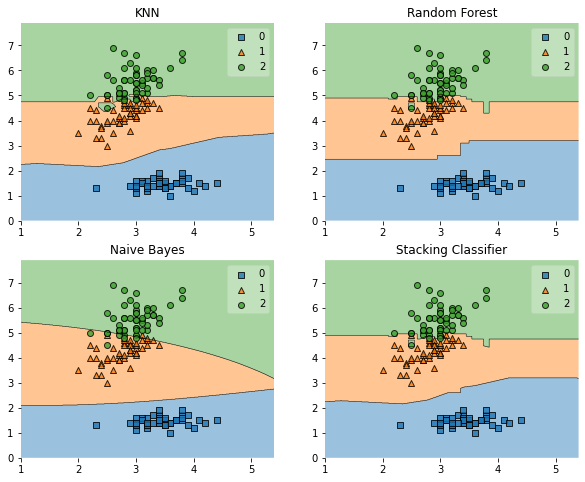

In [6]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions


# 以python自带的鸢尾花数据集为例
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target


clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)


label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)


clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)


plt.show()

### 5.4.2 blending

In [10]:
# 以python自带的鸢尾花数据集为例
data_0 = iris.data
data = data_0[:100,:]


target_0 = iris.target
target = target_0[:100]

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

#模型融合中基学习器
clfs = [LogisticRegression(),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        GradientBoostingClassifier()]
 
#切分一部分数据作为测试集
X, X_predict, y, y_predict = train_test_split(data, target, test_size=0.3, random_state=914)


#切分训练数据集为d1,d2两部分
X_d1, X_d2, y_d1, y_d2 = train_test_split(X, y, test_size=0.5, random_state=914)
dataset_d1 = np.zeros((X_d2.shape[0], len(clfs)))
dataset_d2 = np.zeros((X_predict.shape[0], len(clfs)))
 
for j, clf in enumerate(clfs):
    #依次训练各个单模型
    clf.fit(X_d1, y_d1)
    y_submission = clf.predict_proba(X_d2)[:, 1]
    dataset_d1[:, j] = y_submission
    #对于测试集，直接用这k个模型的预测值作为新的特征。
    dataset_d2[:, j] = clf.predict_proba(X_predict)[:, 1]
    print("val auc Score: %f" % roc_auc_score(y_predict, dataset_d2[:, j]))


#融合使用的模型
clf = GradientBoostingClassifier()
clf.fit(dataset_d1, y_d2)
y_submission = clf.predict_proba(dataset_d2)[:, 1]
print("Val auc Score of Blending: %f" % (roc_auc_score(y_predict, y_submission)))


val auc Score: 1.000000
val auc Score: 1.000000
val auc Score: 1.000000
val auc Score: 1.000000
Val auc Score of Blending: 1.000000


### 5.5 经验总结
- 简单平均和加权平均是常用的两种比赛中模型融合的方式。其优点是快速、简单。
- stacking在众多比赛中大杀四方，但是跑过代码的小伙伴想必能感受到速度之慢，同时stacking多层提升幅度并不能抵消其带来的时间和内存消耗，所以实际环境中应用还是有一定的难度，同时在有答辩环节的比赛中，主办方也会一定程度上考虑模型的复杂程度，所以说并不是模型融合的层数越多越好的。
- 当然在比赛中将加权平均、stacking、blending等混用也是一种策略，可能会收获意想不到的效果哦！

END. 【 杨冰楠：Datawhale成员，金融风控爱好者。】

关于Datawhale：
Datawhale是一个专注于数据科学与AI领域的开源组织，汇集了众多领域院校和知名企业的优秀学习者，聚合了一群有开源精神和探索精神的团队成员。Datawhale 以“for the learner，和学习者一起成长”为愿景，鼓励真实地展现自我、开放包容、互信互助、敢于试错和勇于担当。同时 Datawhale 用开源的理念去探索开源内容、开源学习和开源方案，赋能人才培养，助力人才成长，建立起人与人，人与知识，人与企业和人与未来的联结。
本次数据挖掘路径学习，专题知识将在天池分享，详情可关注Datawhale：

![logo.png](https://img-blog.csdnimg.cn/2020091301022698.png#pic_center)